In [1]:
import pandas as pd
import numpy as np

df_1 = pd.read_csv("for_analysis.csv", sep = ",", index_col = 0)
df_1.head()

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SECONDARY_ENTITY,PREVAILING_WAGE_YEARLY,MEAN_WAGE_RATE_YEARLY,SOC_CODE_MAIN_CATEGORY,NAICS_CODE_MAIN_CATEGORY
0,CERTIFIED,Y,Y,1.0,N,N,N,154232.0,189816.0,11,33
1,CERTIFIED,Y,N,1.0,N,N,N,97780.8,97780.8,11,51
2,CERTIFIED,Y,Y,1.0,N,N,N,47549.0,47549.0,11,54
3,CERTIFIED,Y,Y,1.0,Y,N,N,156146.0,214230.0,11,51
4,CERTIFIED,Y,Y,1.0,N,N,N,75026.0,100000.0,11,31


In [2]:
df_1.dtypes

CASE_STATUS                     object
AGENT_REPRESENTING_EMPLOYER     object
FULL_TIME_POSITION              object
TOTAL_WORKER_POSITIONS         float64
H-1B_DEPENDENT                  object
WILLFUL_VIOLATOR                object
SECONDARY_ENTITY                object
PREVAILING_WAGE_YEARLY         float64
MEAN_WAGE_RATE_YEARLY          float64
SOC_CODE_MAIN_CATEGORY           int64
NAICS_CODE_MAIN_CATEGORY         int64
dtype: object

In [3]:
df_1.isnull().values.any()

False

In [4]:
df_1.CASE_STATUS.value_counts()

CERTIFIED    505522
DENIED         2810
Name: CASE_STATUS, dtype: int64

In [5]:
df_col = ['CASE_STATUS', 'AGENT_REPRESENTING_EMPLOYER','FULL_TIME_POSITION','H-1B_DEPENDENT',
            'WILLFUL_VIOLATOR','SECONDARY_ENTITY',
              'SOC_CODE_MAIN_CATEGORY','NAICS_CODE_MAIN_CATEGORY']
df_2 = pd.get_dummies(df_1,columns = df_col, drop_first=True)
df_2.head()

,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_YEARLY,MEAN_WAGE_RATE_YEARLY,CASE_STATUS_DENIED,AGENT_REPRESENTING_EMPLOYER_Y,FULL_TIME_POSITION_Y,H-1B_DEPENDENT_Y,WILLFUL_VIOLATOR_Y,SECONDARY_ENTITY_Y,SOC_CODE_MAIN_CATEGORY_13,...,NAICS_CODE_MAIN_CATEGORY_53,NAICS_CODE_MAIN_CATEGORY_54,NAICS_CODE_MAIN_CATEGORY_55,NAICS_CODE_MAIN_CATEGORY_56,NAICS_CODE_MAIN_CATEGORY_61,NAICS_CODE_MAIN_CATEGORY_62,NAICS_CODE_MAIN_CATEGORY_71,NAICS_CODE_MAIN_CATEGORY_72,NAICS_CODE_MAIN_CATEGORY_81,NAICS_CODE_MAIN_CATEGORY_92
0,1.0,154232.0,189816.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,97780.8,97780.8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,47549.0,47549.0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,156146.0,214230.0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,75026.0,100000.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling the data using log function

In [6]:
df_3 = df_2.copy()
df_3[['TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_YEARLY','MEAN_WAGE_RATE_YEARLY']] = pd.DataFrame(np.log(df_2[['TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_YEARLY','MEAN_WAGE_RATE_YEARLY']]))

df_3.head()

,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_YEARLY,MEAN_WAGE_RATE_YEARLY,CASE_STATUS_DENIED,AGENT_REPRESENTING_EMPLOYER_Y,FULL_TIME_POSITION_Y,H-1B_DEPENDENT_Y,WILLFUL_VIOLATOR_Y,SECONDARY_ENTITY_Y,SOC_CODE_MAIN_CATEGORY_13,...,NAICS_CODE_MAIN_CATEGORY_53,NAICS_CODE_MAIN_CATEGORY_54,NAICS_CODE_MAIN_CATEGORY_55,NAICS_CODE_MAIN_CATEGORY_56,NAICS_CODE_MAIN_CATEGORY_61,NAICS_CODE_MAIN_CATEGORY_62,NAICS_CODE_MAIN_CATEGORY_71,NAICS_CODE_MAIN_CATEGORY_72,NAICS_CODE_MAIN_CATEGORY_81,NAICS_CODE_MAIN_CATEGORY_92
0,0.0,11.946213,12.153810,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,11.490484,11.490484,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,10.769516,10.769516,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.0,11.958547,12.274805,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,11.225590,11.512925,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### SPECIFYING TARGET AND INDEPENDENT DATA

In [44]:
X = df_3.drop('CASE_STATUS_DENIED', axis = 1)
y = df_3['CASE_STATUS_DENIED']
X.shape

(508332, 57)

### Feature Selection using SelectFromModel and LogisticRegression : 57 TO 24 FEATURES

In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

model_1 = SelectFromModel(estimator=LogisticRegression(max_iter=5000)).fit(X, y)
model_1.estimator_.coef_

array([[ 0.2110218 , -0.48895614,  0.27600634, -0.46570307, -0.91089609,
        -0.72381091,  1.24362388, -0.64252411, -0.03620763, -0.53852058,
        -0.40751508, -0.81299234,  0.51735878,  0.9076995 , -0.06300179,
         0.25239064,  0.07023585,  0.54697134, -0.09525067,  2.31375916,
         0.66804791,  0.45154645, -0.24801785,  0.87899209, -0.12222308,
         0.79591712,  2.02112965,  0.85194945,  0.84281741,  0.95580528,
        -0.00669787, -0.11024956,  0.04251267,  0.48485177, -0.00986628,
         0.15423129,  0.02276023, -0.40917874, -0.01037977,  0.31063521,
         0.1267068 , -0.64515326, -0.09592371, -0.94373499, -0.02289264,
        -0.47268826, -0.72790697,  0.24890865, -0.13752221, -0.11324863,
         0.32112998, -0.71547803,  0.0484257 ,  0.40549289,  0.34305965,
         0.24360486,  0.35508794]])

In [9]:
model_1.threshold_

0.47174071168514986

In [10]:
features_index = model_1.get_support()
features_index

array([False,  True, False, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False])

In [11]:
#Getting the column names of the columns selected
X_new = X.loc[:, features_index]                      
featured_col_names = X_new.columns
print(featured_col_names)

Index(['PREVAILING_WAGE_YEARLY', 'FULL_TIME_POSITION_Y', 'H-1B_DEPENDENT_Y',
       'WILLFUL_VIOLATOR_Y', 'SECONDARY_ENTITY_Y', 'SOC_CODE_MAIN_CATEGORY_15',
       'SOC_CODE_MAIN_CATEGORY_19', 'SOC_CODE_MAIN_CATEGORY_21',
       'SOC_CODE_MAIN_CATEGORY_23', 'SOC_CODE_MAIN_CATEGORY_31',
       'SOC_CODE_MAIN_CATEGORY_35', 'SOC_CODE_MAIN_CATEGORY_37',
       'SOC_CODE_MAIN_CATEGORY_43', 'SOC_CODE_MAIN_CATEGORY_47',
       'SOC_CODE_MAIN_CATEGORY_49', 'SOC_CODE_MAIN_CATEGORY_51',
       'SOC_CODE_MAIN_CATEGORY_53', 'NAICS_CODE_MAIN_CATEGORY_11',
       'NAICS_CODE_MAIN_CATEGORY_23', 'NAICS_CODE_MAIN_CATEGORY_45',
       'NAICS_CODE_MAIN_CATEGORY_49', 'NAICS_CODE_MAIN_CATEGORY_51',
       'NAICS_CODE_MAIN_CATEGORY_52', 'NAICS_CODE_MAIN_CATEGORY_61'],
      dtype='object')


In [12]:
X_m1 = model_1.transform(X) 
X_m1.shape

(508332, 24)

### Feature Selection Using SelectFromModel and LinearSVC: 57 TO 17 FEATURES 

In [13]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

lsvc = LinearSVC(C = 0.02, penalty = 'l1', dual = False, max_iter=20000).fit(X,y) #dual = False because n_samples > n_features
model_2 = SelectFromModel(lsvc, prefit = True)

model_2.get_support()

C:\Users\mehtaa4\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False])

In [14]:
X_m2 = model_2.transform(X) 
X_m2.shape

(508332, 17)

### Feature Selection Using SelectKBest and mutual_info_classif: 57 TO 24 FEATURES 

In [15]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

model_3 = SelectKBest(score_func=mutual_info_classif,k=24)

results_3 = model_3.fit(X,y)

print(results_3.scores_)

[9.84397740e-05 2.12960846e-03 2.46008854e-03 6.03668053e-02
 1.19522218e-01 1.93343020e-02 8.22223252e-05 2.19308445e-02
 7.40374364e-04 6.46452217e-02 6.77776089e-04 2.40304637e-04
 4.93840367e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.23922013e-05 0.00000000e+00 2.15267245e-04 0.00000000e+00
 1.31708816e-05 0.00000000e+00 8.01185461e-05 4.08650159e-05
 0.00000000e+00 1.62511381e-05 1.78913160e-04 1.99560235e-04
 1.87284411e-04 9.41282535e-05 0.00000000e+00 0.00000000e+00
 3.95845705e-05 0.00000000e+00 0.00000000e+00 1.54980406e-05
 0.00000000e+00 1.96624988e-04 1.04369875e-05 0.00000000e+00
 1.04973254e-04 2.65279839e-05 0.00000000e+00 1.91293518e-05
 0.00000000e+00 2.67115689e-04 4.29773768e-04 1.28156674e-04
 5.50544294e-02 3.48625458e-05 0.00000000e+00 1.47877015e-04
 4.83311295e-05 0.00000000e+00 0.00000000e+00 9.32312305e-05
 5.59877871e-05]


In [16]:
X_m3 = model_3.transform(X) 
X_m3.shape

(508332, 24)

### Feature Selection Using VarianceThreshold: 57 TO 6 FEATURES

In [17]:
from sklearn.feature_selection import VarianceThreshold
model_4 = VarianceThreshold(threshold=(.8 * (1 - .8)))
model_4.fit_transform(X)

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       [1.79175947, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.79175947, 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [18]:
model_4.get_support()

array([ True, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False])

In [19]:
X_m4 = model_4.transform(X) 
X_m4.shape

(508332, 6)

### Feature Selection using GLM OLS: 57 TO 26 FEATURES

In [62]:
import statsmodels.api as sm

X = df_3.drop(['CASE_STATUS_DENIED'], axis = 1)
y = df_3['CASE_STATUS_DENIED']

log_ols = sm.GLM(y, X, family = sm.families.Binomial())
result_ols = log_ols.fit(fit_intercept = True)
print(result_ols.summary2())

                            Results: Generalized linear model
Model:                      GLM                       AIC:                   33182.4745   
Link Function:              logit                     BIC:                   -6645100.8689
Dependent Variable:         CASE_STATUS_DENIED        Log-Likelihood:        -16534.      
Date:                       2020-08-05 01:01          LL-Null:               -17408.      
No. Observations:           508332                    Deviance:              33068.       
Df Model:                   56                        Pearson chi2:          5.12e+05     
Df Residuals:               508275                    Scale:                 1.0000       
Method:                     IRLS                                                          
------------------------------------------------------------------------------------------
                               Coef.    Std.Err.     z     P>|z|     [0.025       0.975]  
----------------------------

In [21]:
ols_features = [
'TOTAL_WORKER_POSITIONS',
'PREVAILING_WAGE_YEARLY',
'MEAN_WAGE_RATE_YEARLY',
'AGENT_REPRESENTING_EMPLOYER_Y',
'FULL_TIME_POSITION_Y',
'H-1B_DEPENDENT_Y',
'WILLFUL_VIOLATOR_Y',
'SECONDARY_ENTITY_Y',
'SOC_CODE_MAIN_CATEGORY_15',
'SOC_CODE_MAIN_CATEGORY_17',
'SOC_CODE_MAIN_CATEGORY_19',
'SOC_CODE_MAIN_CATEGORY_21',
'SOC_CODE_MAIN_CATEGORY_23',
'SOC_CODE_MAIN_CATEGORY_27',
'SOC_CODE_MAIN_CATEGORY_35',
'SOC_CODE_MAIN_CATEGORY_37',
'SOC_CODE_MAIN_CATEGORY_43',
'SOC_CODE_MAIN_CATEGORY_49',
'SOC_CODE_MAIN_CATEGORY_51',
'SOC_CODE_MAIN_CATEGORY_53',
'NAICS_CODE_MAIN_CATEGORY_33',
'NAICS_CODE_MAIN_CATEGORY_45',
'NAICS_CODE_MAIN_CATEGORY_49',
'NAICS_CODE_MAIN_CATEGORY_51',
'NAICS_CODE_MAIN_CATEGORY_52',
'NAICS_CODE_MAIN_CATEGORY_61',
]


X_m5 = df_3[ols_features]
X_m5.shape

(508332, 26)

### Imbalanced Dataset: OVERSAMPLING

In [22]:
certified = df_3[df_3['CASE_STATUS_DENIED'] == 0]
denied = df_3[df_3['CASE_STATUS_DENIED'] == 1]
print(certified.shape, denied.shape)

(505522, 58) (2810, 58)


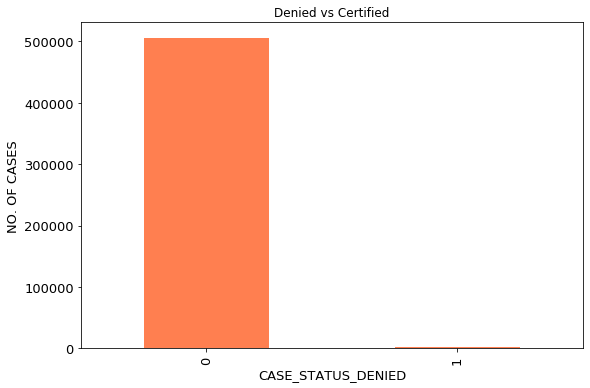

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

df_3['CASE_STATUS_DENIED'].value_counts().plot(kind = 'bar', figsize=(9,6),
                                        color="coral", fontsize=13)
plt.xlabel("CASE_STATUS_DENIED", fontsize=13)
plt.ylabel("NO. OF CASES" , fontsize=13)
# plt.xticks(range(2))
plt.title("Denied vs Certified")
plt.show()

In [24]:
# RUN IN ANACONDA PROMPT: conda install -c conda-forge imbalanced-learn 

### Logistic Regression using Complete Test and Train data

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 0)
X_train.shape
X_test.shape

(152500, 57)

In [26]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os = RandomOverSampler(0.75)
X_train_nm,y_train_nm = os.fit_sample(X_train,y_train)

print("Data shape before oversampling {}".format(Counter(y_train)))
print("Data shape after oversampling {}".format(Counter(y_train_nm)))

C:\Users\mehtaa4\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Data shape before oversampling Counter({0: 353924, 1: 1908})
Data shape after oversampling Counter({0: 353924, 1: 265443})


In [27]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_nm, y_train_nm)
y_pred = logreg.predict(X_test)
print("Accuracy: ", logreg.score(X_test, y_test))

Accuracy:  0.7896524590163935


### Logistic Regression using feature selection from SelectFromModel and LogisticRegression 

In [73]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_m1, y, test_size=0.3, random_state=0)

os_1 = RandomOverSampler(0.75)
X_train1_nm,y_train1_nm = os_1.fit_sample(X_train1,y_train1)

print("Data shape before oversampling {}".format(Counter(y_train1)))
print("Data shape after oversampling {}".format(Counter(y_train1_nm)))

logreg_m1 = LogisticRegression(max_iter=5000)
logreg_m1.fit(X_train1_nm, y_train1_nm)
y_pred_1 = logreg_m1.predict(X_test1)
print("Accuracy for SelectFromModel with LogisticRegression: ", logreg_m1.score(X_test1, y_test1))

C:\Users\mehtaa4\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Data shape before oversampling Counter({0: 353924, 1: 1908})
Data shape after oversampling Counter({0: 353924, 1: 265443})
Accuracy for SelectFromModel with LogisticRegression:  0.8107278688524591


### Logistic Regression using feature selection from SelectFromModel and LinearSVC

In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_m2, y, test_size=0.3, random_state=0)

os_2 = RandomOverSampler(0.75)
X_train2_nm,y_train2_nm = os_2.fit_sample(X_train2,y_train2)
print("Data shape before oversampling {}".format(Counter(y_train2)))
print("Data shape after oversampling {}".format(Counter(y_train2_nm)))

logreg_m2 = LogisticRegression(max_iter=5000)
logreg_m2.fit(X_train2_nm, y_train2_nm)
y_pred_2 = logreg_m2.predict(X_test2)
print("Accuracy: ", logreg_m2.score(X_test2, y_test2))

C:\Users\mehtaa4\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Data shape before oversampling Counter({0: 353924, 1: 1908})
Data shape after oversampling Counter({0: 353924, 1: 265443})
Accuracy:  0.7673770491803279


### Logistic Regression using feature selection from SelectKBest and mutual_info_classif

In [30]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_m3, y, test_size=0.3, random_state=0)

os_3 = RandomOverSampler(0.75)
X_train3_nm,y_train3_nm = os_3.fit_sample(X_train3,y_train3)
print("Data shape before oversampling {}".format(Counter(y_train3)))
print("Data shape after oversampling {}".format(Counter(y_train3_nm)))

logreg_m3 = LogisticRegression(max_iter=5000)
logreg_m3.fit(X_train3_nm, y_train3_nm)
y_pred_3 = logreg_m3.predict(X_test3)
print("Accuracy: ", logreg_m3.score(X_test3, y_test3))

C:\Users\mehtaa4\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Data shape before oversampling Counter({0: 353924, 1: 1908})
Data shape after oversampling Counter({0: 353924, 1: 265443})
Accuracy:  0.7945573770491803


### Logistic Regression using feature selection from VarianceThreshold

In [31]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_m4, y, test_size=0.3, random_state=0)

os_4 = RandomOverSampler(0.75)
X_train4_nm,y_train4_nm = os_4.fit_sample(X_train4,y_train4)
print("Data shape before oversampling {}".format(Counter(y_train4)))
print("Data shape after oversampling {}".format(Counter(y_train4_nm)))

logreg_m4 = LogisticRegression(max_iter=5000)
logreg_m4.fit(X_train4_nm, y_train4_nm)
y_pred_4 = logreg_m4.predict(X_test4)
print("Accuracy: ", logreg_m4.score(X_test4, y_test4))

C:\Users\mehtaa4\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Data shape before oversampling Counter({0: 353924, 1: 1908})
Data shape after oversampling Counter({0: 353924, 1: 265443})
Accuracy:  0.7252131147540983


### Logistic Regression using feature selection from GLM OLS Manual Inspection

In [32]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_m5, y, test_size=0.3, random_state=0)

os_5 = RandomOverSampler(0.75)
X_train5_nm,y_train5_nm = os_5.fit_sample(X_train5,y_train5)

print("Data shape before oversampling {}".format(Counter(y_train5)))
print("Data shape after oversampling {}".format(Counter(y_train5_nm)))

logreg_m5 = LogisticRegression(max_iter=5000)
logreg_m5.fit(X_train5_nm, y_train5_nm)
y_pred_5 = logreg_m5.predict(X_test5)
print("Accuracy for SelectFromModel with LogisticRegression: ", logreg_m5.score(X_test5, y_test5))
X_test5.shape

C:\Users\mehtaa4\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Data shape before oversampling Counter({0: 353924, 1: 1908})
Data shape after oversampling Counter({0: 353924, 1: 265443})
Accuracy for SelectFromModel with LogisticRegression:  0.8036131147540984


(152500, 26)

## Selecting logreg_m1(Logistic Regression model) which uses feature selection from SelectFromModel and LogisticRegression

In [45]:
logit_model = sm.GLM(y, X_m1, family = sm.families.Binomial())
results = logit_model.fit(fit_intercept = True)

print(results.summary2())

                 Results: Generalized linear model
Model:              GLM                AIC:            33366.0247   
Link Function:      logit              BIC:            -6645284.9020
Dependent Variable: CASE_STATUS_DENIED Log-Likelihood: -16659.      
Date:               2020-08-05 00:43   LL-Null:        -17408.      
No. Observations:   508332             Deviance:       33318.       
Df Model:           23                 Pearson chi2:   5.28e+05     
Df Residuals:       508308             Scale:          1.0000       
Method:             IRLS                                            
-----------------------------------------------------------------------
         Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
-----------------------------------------------------------------------
x1      -0.3104      0.0062    -49.6889    0.0000    -0.3227    -0.2982
x2      -1.0657      0.0730    -14.5990    0.0000    -1.2087    -0.9226
x3      -0.6332      0.0628    -10.08

In [47]:
pd.DataFrame(zip(results.params,results.pvalues), columns = ['Coefficient', 'p-value'],index =  featured_col_names)

,Coefficient,p-value
PREVAILING_WAGE_YEARLY,-0.310420,0.000000e+00
FULL_TIME_POSITION_Y,-1.065673,2.851543e-48
H-1B_DEPENDENT_Y,-0.633229,6.635522e-24
WILLFUL_VIOLATOR_Y,1.761833,2.670955e-03
SECONDARY_ENTITY_Y,-0.588384,2.216371e-22
SOC_CODE_MAIN_CATEGORY_15,-0.372036,1.643654e-16
SOC_CODE_MAIN_CATEGORY_19,-0.591390,8.571598e-08
SOC_CODE_MAIN_CATEGORY_21,0.661021,1.608639e-03
SOC_CODE_MAIN_CATEGORY_23,1.089055,1.074520e-17
SOC_CODE_MAIN_CATEGORY_31,1.950862,6.130390e-02


### OBTAINING ODD RATIOS

In [48]:
import numpy as np
params = results.params
conf = results.conf_int()
conf['Odd Ratios'] = params
conf.index = featured_col_names
conf.columns = ['2.5%', '97.5%', 'Odd Ratios']
(np.exp(conf))

,2.5%,97.5%,Odd Ratios
PREVAILING_WAGE_YEARLY,0.724217,0.742171,0.733139
FULL_TIME_POSITION_Y,0.298572,0.397483,0.344496
H-1B_DEPENDENT_Y,0.469386,0.600419,0.530875
WILLFUL_VIOLATOR_Y,1.844196,18.386616,5.823102
SECONDARY_ENTITY_Y,0.493176,0.625078,0.555224
SOC_CODE_MAIN_CATEGORY_15,0.630988,0.753065,0.689330
SOC_CODE_MAIN_CATEGORY_19,0.445813,0.687342,0.553557
SOC_CODE_MAIN_CATEGORY_21,1.284400,2.920484,1.936768
SOC_CODE_MAIN_CATEGORY_23,2.316047,3.812363,2.971466
SOC_CODE_MAIN_CATEGORY_31,0.911707,54.280247,7.034748


### CONFUSION MATRIX

In [49]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test1, y_pred_1)
conf_matrix

array([[123511,  28087],
       [   540,    362]], dtype=int64)

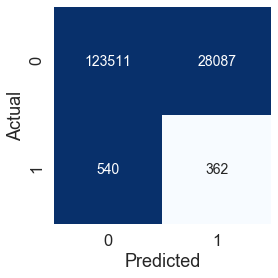

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

data = conf_matrix
df_cm = pd.DataFrame(conf_matrix, columns = np.unique(y_test1), index = np.unique(y_test1))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.set(font_scale = 1.5)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}, cbar=False,
          vmax=500, square=True, fmt="d", cmap=plt.cm.Blues)

### CLASSIFICATION REPORT

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90    151598
           1       0.01      0.40      0.02       902

    accuracy                           0.81    152500
   macro avg       0.50      0.61      0.46    152500
weighted avg       0.99      0.81      0.89    152500



### GENERATE ROC CURVE

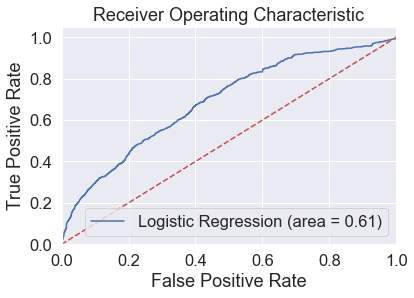

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test1, logreg_m1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, logreg_m1.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
X_test1.shape

(152500, 24)

### PREDICTED_PROBABILITES

In [55]:
pred_prob = logreg_m1.predict_proba(X_test1)
print(pred_prob)

[[0.78886098 0.21113902]
 [0.67166085 0.32833915]
 [0.51631874 0.48368126]
 ...
 [0.51243565 0.48756435]
 [0.78904543 0.21095457]
 [0.79086005 0.20913995]]


### CLASS MEMBERSHIP

In [63]:
# append predicted data to test data
data_store = pd.DataFrame(X_test1)
data_store.columns = featured_col_names

# #inverse the transformed data
data_store[['PREVAILING_WAGE_YEARLY']] = pd.DataFrame(np.exp(df_3[['PREVAILING_WAGE_YEARLY']]))
data_store['y_predicted'] = y_pred_1
data_store

,PREVAILING_WAGE_YEARLY,FULL_TIME_POSITION_Y,H-1B_DEPENDENT_Y,WILLFUL_VIOLATOR_Y,SECONDARY_ENTITY_Y,SOC_CODE_MAIN_CATEGORY_15,SOC_CODE_MAIN_CATEGORY_19,SOC_CODE_MAIN_CATEGORY_21,SOC_CODE_MAIN_CATEGORY_23,SOC_CODE_MAIN_CATEGORY_31,...,SOC_CODE_MAIN_CATEGORY_51,SOC_CODE_MAIN_CATEGORY_53,NAICS_CODE_MAIN_CATEGORY_11,NAICS_CODE_MAIN_CATEGORY_23,NAICS_CODE_MAIN_CATEGORY_45,NAICS_CODE_MAIN_CATEGORY_49,NAICS_CODE_MAIN_CATEGORY_51,NAICS_CODE_MAIN_CATEGORY_52,NAICS_CODE_MAIN_CATEGORY_61,y_predicted
0,154232.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,97780.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,47549.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,156146.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,75026.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152495,109242.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
152496,109242.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
152497,109242.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
152498,113318.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [64]:
data_store["pred_prob"] = pred_prob[:,1]

In [65]:
import os
import sys

try:
    os.remove("Class Membership.csv")
except:
    print(sys.exc_info()[0], "occured while deleting file ")

data_store.to_csv("Class Membership.csv")
print("File created successfully!")

File created successfully!


### OUT OF SAMPLE PREDICTION ANALYSIS

In [78]:
featured_col_names

Index(['PREVAILING_WAGE_YEARLY', 'FULL_TIME_POSITION_Y', 'H-1B_DEPENDENT_Y',
       'WILLFUL_VIOLATOR_Y', 'SECONDARY_ENTITY_Y', 'SOC_CODE_MAIN_CATEGORY_15',
       'SOC_CODE_MAIN_CATEGORY_19', 'SOC_CODE_MAIN_CATEGORY_21',
       'SOC_CODE_MAIN_CATEGORY_23', 'SOC_CODE_MAIN_CATEGORY_31',
       'SOC_CODE_MAIN_CATEGORY_35', 'SOC_CODE_MAIN_CATEGORY_37',
       'SOC_CODE_MAIN_CATEGORY_43', 'SOC_CODE_MAIN_CATEGORY_47',
       'SOC_CODE_MAIN_CATEGORY_49', 'SOC_CODE_MAIN_CATEGORY_51',
       'SOC_CODE_MAIN_CATEGORY_53', 'NAICS_CODE_MAIN_CATEGORY_11',
       'NAICS_CODE_MAIN_CATEGORY_23', 'NAICS_CODE_MAIN_CATEGORY_45',
       'NAICS_CODE_MAIN_CATEGORY_49', 'NAICS_CODE_MAIN_CATEGORY_51',
       'NAICS_CODE_MAIN_CATEGORY_52', 'NAICS_CODE_MAIN_CATEGORY_61'],
      dtype='object')

In [107]:
X_new = [[85000, 1, 1,
          0, 0, 1,
          0, 0, 
          0, 0, 
          0, 0,
          0, 0,
          0, 0,
          0, 0,
          0, 0,
          0, 1,
          0, 0
         ]]

y_predict = logreg_m1.predict(X_new)
y_predict

array([0], dtype=uint8)

In [104]:
if y_predict == 0:
    class_label = "Accepted"
else:
    class_label = "Denied"
    
print("The predicted class membership for the application is",y_predict," which means that the applicant will be", class_label)

The predicted class membership for the application is [0]  which means that the applicant will be Accepted


In [105]:
if y_predict == 0:
    y_pred_prob = logreg_m1.predict_proba(X_new)[:,0]
    prob_label = ", which means the probability of acceptance of the application is"
else:
    y_predict = logreg_m1.predict_proba(X_new)[:,1]
    prob_label = ", which means the probability of denial of the application is"
    
print("Predicted probability is",y_pred_prob, prob_label, y_pred_prob)

Predicted probability is [1.] , which means the probability of acceptance of the application is [1.]
